# WDSA-CCWI 2022
# <font color='blue'> TSNet Short Tutorial

## Example 4: TNet3 - burst with background leak

In this example we will use Tnet3 to demonstrate how to simulate burst event with a background leak. We will generate a burst at Junction-20 with an existing background leak at Junction-22.

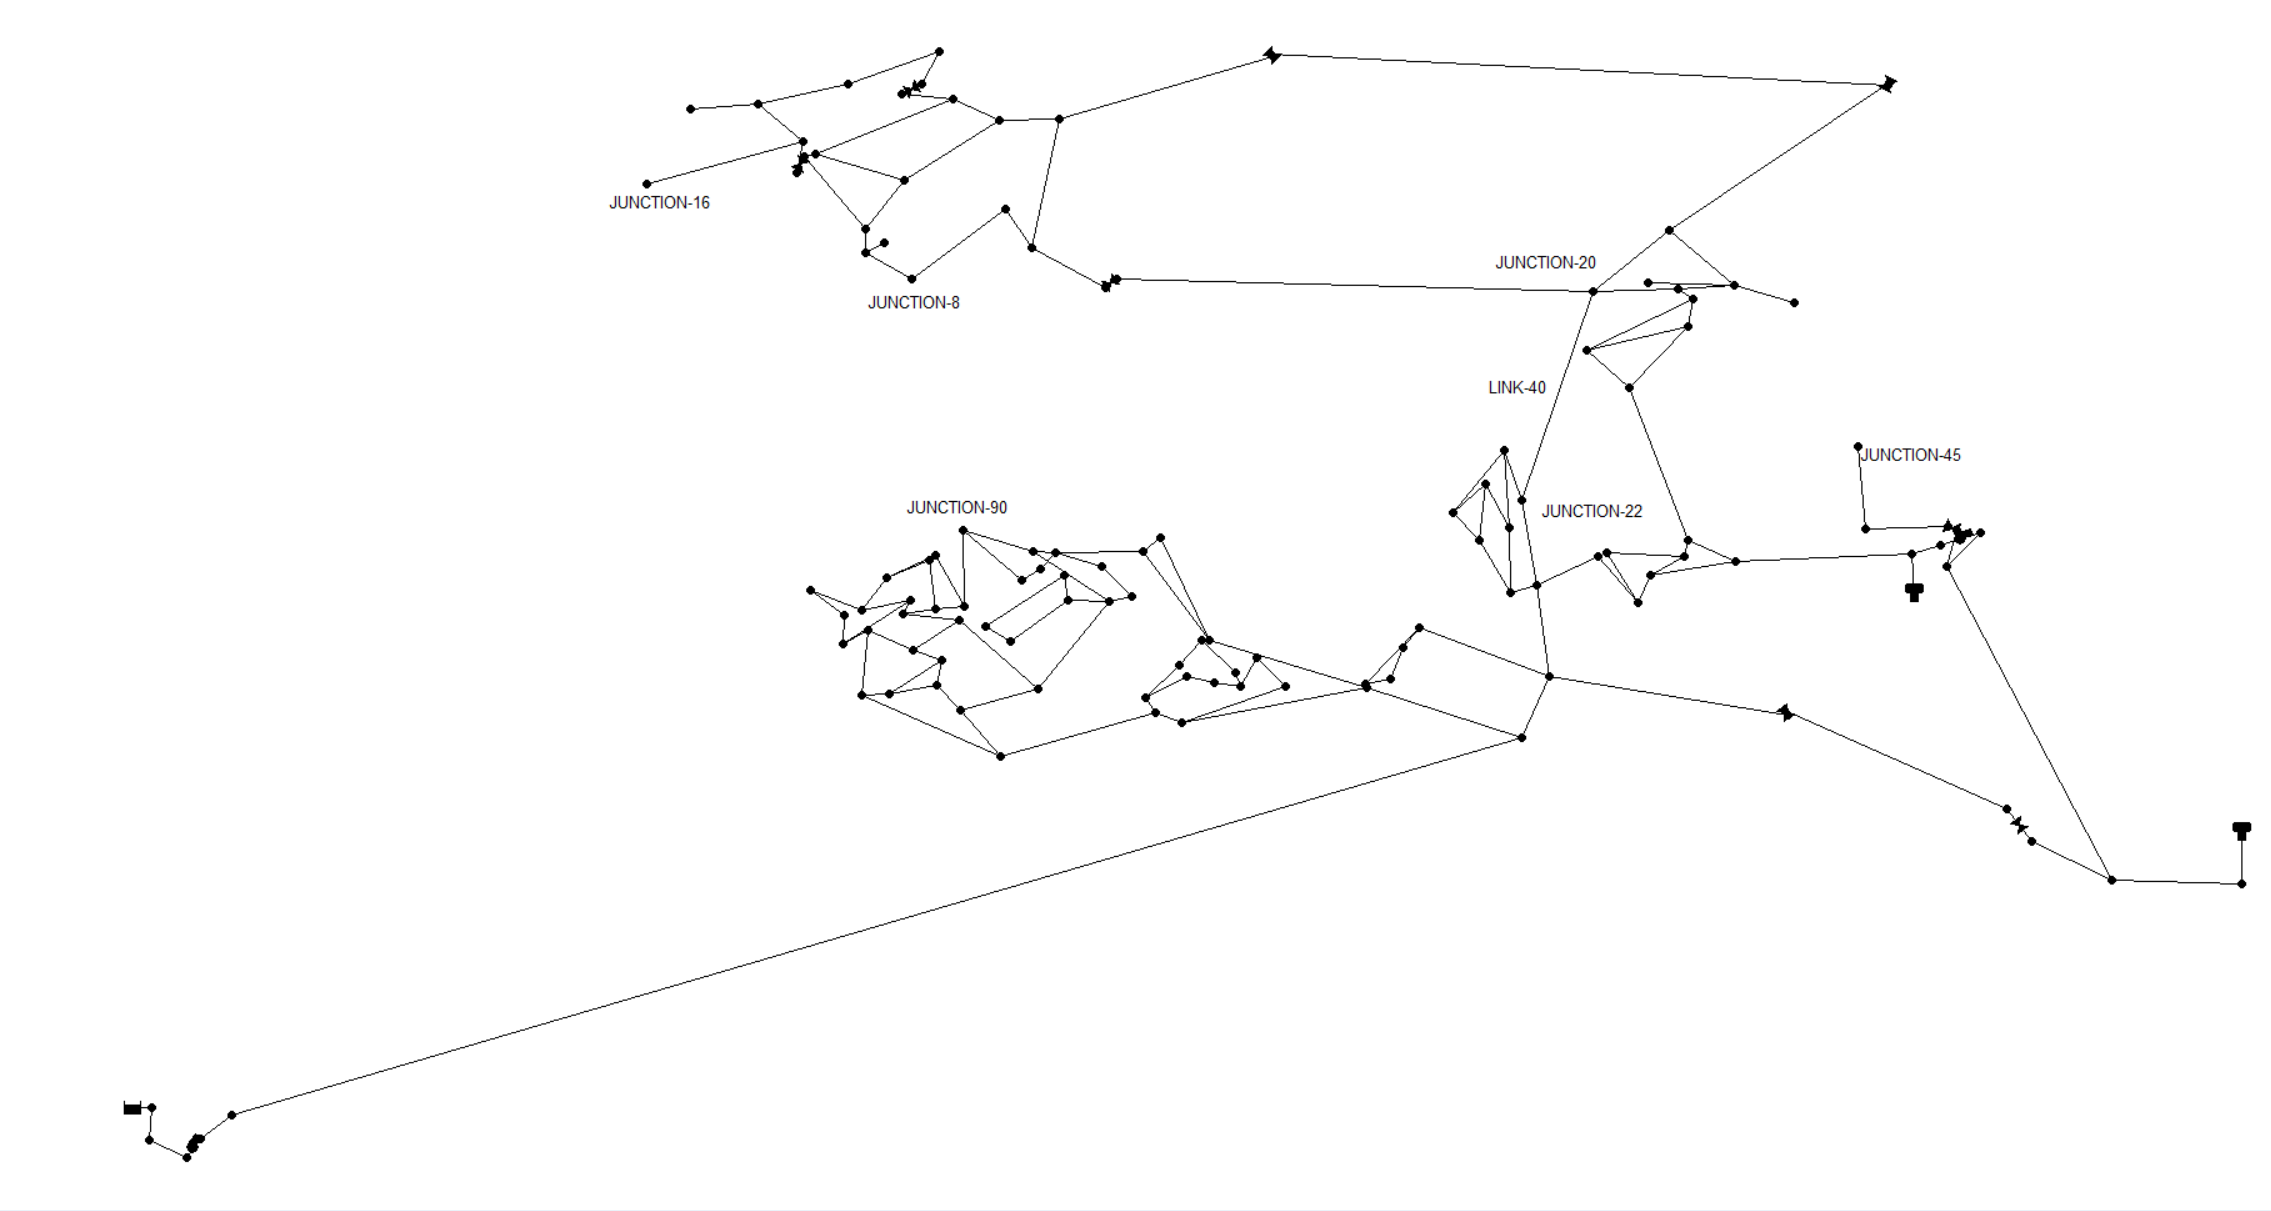

### Import packages

In [1]:
import tsnet
import matplotlib.pyplot as plt
import numpy as np

### Create the model, define settings, and execute simuation

In [3]:
#%% TNet3: Burst event with a background leak
#-------------------------------------------------

inp_file = 'networks/Tnet3.inp'
tm = tsnet.network.TransientModel(inp_file)

# Set wavespeed
#-------------------------------------------------
wavespeed = np.random.normal(1200., 100., size=tm.num_pipes)
tm.set_wavespeed(wavespeed)
# Set time step
tf = 20 # simulation period [s]
tm.set_time(tf)

# Add leak
#-------------------------------------------------
emitter_coeff = 0.01 # [ m^3/s/(m H20)^(1/2)]
tm.add_leak('JUNCTION-22', emitter_coeff)

# Add burst
#-------------------------------------------------
ts = 1 # burst start time
tc = 1 # time for burst to fully develop
final_burst_coeff = 0.01 # final burst coeff [ m^3/s/(m H20)^(1/2)]
tm.add_burst('JUNCTION-20', ts, tc, final_burst_coeff)

# Initialize steady state simulation
#-------------------------------------------------
t0 = 0. # initialize the simulation at 0s
engine = 'PDD' 
tm = tsnet.simulation.Initializer(tm, t0, engine)

# Transient simulation
#-------------------------------------------------
result_obj = 'Tnet3_burst_with_leak' # name of the object for saving simulation results
tm = tsnet.simulation.MOCSimulator(tm,result_obj)

Simulation time step 0.01168 s
Total Time Step in this simulation 1712
Initial condition discrepancy of pressure (-0.1300 m) on the JUNCTION-124 node
Initial condition discrepancy of pressure (-0.1105 m) on the JUNCTION-122 node
Initial condition discrepancy of pressure (0.1159 m) on the JUNCTION-123 node
Initial condition discrepancy of pressure (0.1354 m) on the JUNCTION-121 node
Estimated simulation time 0:00:53.188416
Transient simulation completed 9 %...
Transient simulation completed 19 %...
Transient simulation completed 29 %...
Transient simulation completed 39 %...
Transient simulation completed 49 %...
Transient simulation completed 59 %...
Transient simulation completed 69 %...
Transient simulation completed 79 %...
Transient simulation completed 89 %...
Transient simulation completed 99 %...


### Get results

- Junction-22 leak discharge

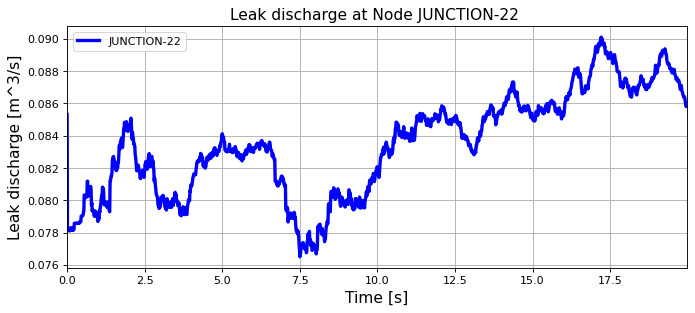

In [3]:
# Junction-22 leak discharge
#-------------------------------------------------
node = 'JUNCTION-22'
node = tm.get_node(node)
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tm.simulation_timestamps,node.emitter_discharge, 'b', lw=3,label = 'JUNCTION-22')
plt.xlim([tm.simulation_timestamps[0],tm.simulation_timestamps[-1]])
plt.title('Leak discharge at Node %s '%node, fontsize=14)
plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("Leak discharge [m^3/s]", fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()
fig.savefig('./networks/Tnet3_burst_w_leak_J22_leak_discharge.pdf', format='pdf',dpi=100)

- Junction-20 burst discharge

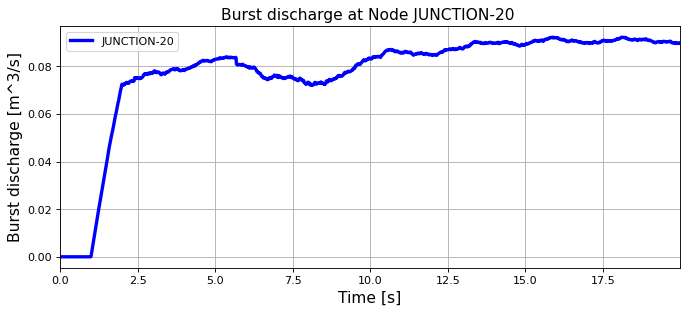

In [4]:
# Junction-20 burst discharge
#-------------------------------------------------
node = 'JUNCTION-20'
node = tm.get_node(node)
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tm.simulation_timestamps,node.emitter_discharge, 'b', lw=3, label = 'JUNCTION-20')
plt.xlim([tm.simulation_timestamps[0],tm.simulation_timestamps[-1]])
plt.title('Burst discharge at Node %s '%node, fontsize=14)
plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("Burst discharge [m^3/s]", fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()
fig.savefig('./networks/Tnet3_burst_w_leak_J20_burst_discharge.pdf', format='pdf',dpi=100)

- Pressure head at different nodes in the network

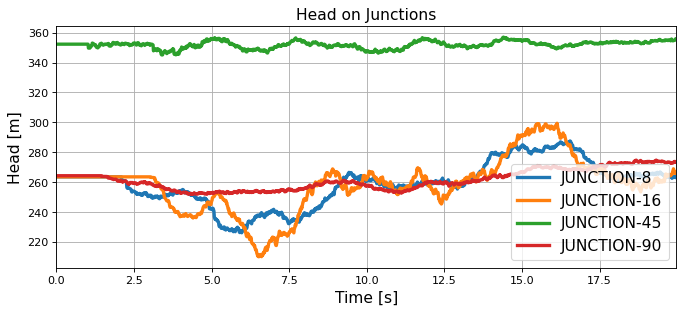

In [5]:
# Pressure head at different nodes in the network
#-------------------------------------------------
node1 = tm.get_node('JUNCTION-8')
node2 = tm.get_node('JUNCTION-16')
node3 = tm.get_node('JUNCTION-45')
node4 = tm.get_node('JUNCTION-90')
fig = plt.figure(figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tm.simulation_timestamps,node1.head, lw=3, label='JUNCTION-8')
plt.plot(tm.simulation_timestamps,node2.head, lw=3, label='JUNCTION-16')
plt.plot(tm.simulation_timestamps,node3.head, lw=3, label='JUNCTION-45')
plt.plot(tm.simulation_timestamps,node4.head, lw=3, label='JUNCTION-90')
plt.xlim([tm.simulation_timestamps[0],tm.simulation_timestamps[-1]])
plt.title('Head on Junctions', fontsize=14)
plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("Head [m]", fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.grid(True)
plt.show()
fig.savefig('./networks/Tnet3_burst_w_leak_head.pdf', format='pdf',dpi=100)
